## Natural Language Processing Analysis of State's Curricula in Brazil

### Step 01 : Text Wrangling

Cleanning the data: 

Tokenizing
Tagger
Parser
Ner

Remove Punctuation

In [1]:
import spacy
import numpy as np
import pandas as pd
import seaborn as sns

from string import punctuation
from collections import Counter

import regex as re

In [2]:
import nltk
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Francisco\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Francisco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Francisco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Francisco\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Francisco\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [3]:
# Testing
lang = 'pt'
pipeline = ["tok2vec", "tagger", "parser", "lemmatizer"]

In [4]:
# Setup in Brazilian Portuguese

import pt_core_news_sm
nlp = pt_core_news_sm.load()
path = r'C:\Users\Francisco\Desktop\Python\FinalPaper\Analysis\\*.txt'
nlp.max_length = 15384682

In [5]:
# Setting .txt as a Corpus

AM = open(r'C:\\Users\\Francisco\\Desktop\\Python\\FinalPaper\\Analysis\\AM.txt', encoding = 'utf-8').read()
DF = open(r'C:\\Users\\Francisco\\Desktop\\Python\\FinalPaper\\Analysis\\DF.txt', encoding = 'utf-8').read()
GO = open(r'C:\\Users\\Francisco\\Desktop\\Python\\FinalPaper\\Analysis\\GO.txt', encoding = 'utf-8').read()
MG = open(r'C:\\Users\\Francisco\\Desktop\\Python\\FinalPaper\\Analysis\\MG.txt', encoding = 'utf-8').read()
MT = open(r'C:\\Users\\Francisco\\Desktop\\Python\\FinalPaper\\Analysis\\MG.txt', encoding = 'utf-8').read()
PA = open(r'C:\\Users\\Francisco\\Desktop\\Python\\FinalPaper\\Analysis\\PA.txt', encoding = 'utf-8').read()
PE = open(r'C:\\Users\\Francisco\\Desktop\\Python\\FinalPaper\\Analysis\\PE.txt', encoding = 'utf-8').read()
SC = open(r'C:\\Users\\Francisco\\Desktop\\Python\\FinalPaper\\Analysis\\SC.txt', encoding = 'utf-8').read()
SP = open(r'C:\\Users\\Francisco\\Desktop\\Python\\FinalPaper\\Analysis\\SP.txt', encoding = 'utf-8').read()
BNCC = open(r'C:\\Users\\Francisco\\Desktop\\Python\\FinalPaper\\Analysis\\BNCC.txt', encoding = 'utf-8').read()          

In [6]:
text = MG

In [7]:
#doc1 = list(nlp.pipe(text))

Next chunk will have spaCy apply its entire NLP "pipeline" to the text as soon as it is provided to the model and outputs a processed "doc."

<img src="https://d33wubrfki0l68.cloudfront.net/3ad0582d97663a1272ffc4ccf09f1c5b335b17e9/7f49c/pipeline-fde48da9b43661abcdf62ab70a546d71.svg">

In [8]:
# To have the choice of applying pipeline to Corpus at the same time
doc = nlp(text)

In [9]:
# doc = list(nlp.pipe(MG))

In [10]:
doc[:20]

﻿CURRÍCULO
CURRÍCULO REFERÊNCIA DE MINAS GERAIS
Currículo Referência de Minas Gerais
Lista de Figuras
Figura 1

In [11]:
# Words Object

words = [token.text for token in doc]

In [12]:
# Sentences Object

sentences = [sent.text for sent in doc.sents]

## Cleaning

In [13]:
# Remove Punctuation and Spaces
no_punct_or_space = [token for token in doc if token.is_punct == False and token.is_space == False]

# Remove Numbers and lower case everything
lower_alpha = [token.lower_ for token in no_punct_or_space if token.is_alpha == True]

# Remove Custom Stop Words (if needed)

#custom_stopwords = ["distrito", "federal"]
#custom_clean = [token for token in clean if token not in custom_stopwords]
#custom_clean

In [14]:
# Cleaned Corpus

clean = [token.lower_ for token in no_punct_or_space if token.is_alpha == True and token.is_stop == False]
clean[:30]
type(clean)

list

## Part-of-speech tagging

In [15]:
nouns = [token for token in doc if token.pos_ == "NOUN"]
verbs = [token for token in doc if token.pos_ == "VERB"]
proper_nouns = [token for token in doc if token.pos_ == "PROPN"]
adjectives = [token for token in doc if token.pos_ == "ADJ"]
adverbs = [token for token in doc if token.pos_ == "ADV"]

In [16]:
pos_counts = {
    "nouns": len(nouns),
    "verbs": len(verbs),
    "proper_nouns": len(proper_nouns),
    "adjectives": len(adjectives),
    "adverbs": len(adverbs) 
}

pos_counts

{'nouns': 49768,
 'verbs': 16401,
 'proper_nouns': 18582,
 'adjectives': 16578,
 'adverbs': 4250}

In [17]:
nlp.pipe_names

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

## Counting

In [18]:
print("Number of tokens in document: ", len(doc))
print("Number of tokens in cleaned document: ", len(clean))
print("Number of unique tokens in cleaned document: ", len(set(clean)))

Number of tokens in document:  220689
Number of tokens in cleaned document:  95357
Number of unique tokens in cleaned document:  10792


In [19]:
from collections import Counter

cleaned_counter = Counter(clean)
cleaned_counter.most_common(100)

[('educação', 1329),
 ('ensino', 838),
 ('currículo', 830),
 ('gerais', 784),
 ('minas', 710),
 ('referência', 686),
 ('estudantes', 618),
 ('vida', 537),
 ('diferentes', 520),
 ('formação', 472),
 ('conhecimento', 445),
 ('sociais', 424),
 ('trabalho', 422),
 ('desenvolvimento', 394),
 ('habilidades', 386),
 ('práticas', 386),
 ('social', 354),
 ('médio', 353),
 ('mundo', 335),
 ('processo', 311),
 ('análise', 302),
 ('estudante', 302),
 ('produção', 300),
 ('tecnologias', 295),
 ('brasil', 281),
 ('processos', 279),
 ('conhecimentos', 279),
 ('nacional', 277),
 ('linguagens', 265),
 ('escola', 254),
 ('profissional', 252),
 ('campo', 250),
 ('aprendizagem', 248),
 ('lei', 241),
 ('textos', 240),
 ('culturais', 238),
 ('básica', 234),
 ('construção', 233),
 ('bncc', 227),
 ('escolar', 227),
 ('competências', 224),
 ('ciências', 224),
 ('sociedade', 224),
 ('acesso', 220),
 ('relações', 219),
 ('curricular', 218),
 ('curriculares', 214),
 ('contexto', 211),
 ('n', 210),
 ('natureza', 2

## LDA

In [20]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [21]:
corpus = [d.split() for d in clean]
dictionary = corpora.Dictionary(corpus)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in corpus]

In [22]:
LDA = gensim.models.ldamodel.LdaModel

lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=29, random_state=100,
                chunksize=1000, passes=100,iterations=100)

In [23]:
lda_model.print_topics()

[(0,
  '0.000*"chamar" + 0.000*"incessantes" + 0.000*"carta" + 0.000*"ameneceu" + 0.000*"concluímos" + 0.000*"acontece" + 0.000*"comportar" + 0.000*"precisamente" + 0.000*"ocupa" + 0.000*"epicuro"'),
 (23,
  '0.000*"chamar" + 0.000*"incessantes" + 0.000*"carta" + 0.000*"ameneceu" + 0.000*"concluímos" + 0.000*"acontece" + 0.000*"comportar" + 0.000*"precisamente" + 0.000*"ocupa" + 0.000*"epicuro"'),
 (14,
  '0.000*"chamar" + 0.000*"incessantes" + 0.000*"carta" + 0.000*"ameneceu" + 0.000*"concluímos" + 0.000*"acontece" + 0.000*"comportar" + 0.000*"precisamente" + 0.000*"ocupa" + 0.000*"epicuro"'),
 (3,
  '0.000*"chamar" + 0.000*"incessantes" + 0.000*"carta" + 0.000*"ameneceu" + 0.000*"concluímos" + 0.000*"acontece" + 0.000*"comportar" + 0.000*"precisamente" + 0.000*"ocupa" + 0.000*"epicuro"'),
 (26,
  '0.000*"chamar" + 0.000*"incessantes" + 0.000*"carta" + 0.000*"ameneceu" + 0.000*"concluímos" + 0.000*"acontece" + 0.000*"comportar" + 0.000*"precisamente" + 0.000*"ocupa" + 0.000*"epicuro"'

In [24]:
top_words_per_topic = []
for t in range(lda_model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in lda_model.show_topic(t, topn = 5)])

In [25]:
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])

In [26]:
df[:40]

,Topic,Word,P
0,0,acontece,0.000093
1,0,concluímos,0.000093
2,0,precisamente,0.000093
3,0,comportar,0.000093
4,0,chamar,0.000093
5,1,acontece,0.000093
6,1,concluímos,0.000093
7,1,precisamente,0.000093
8,1,comportar,0.000093
9,1,chamar,0.000093


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

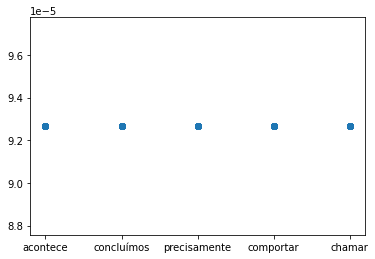

In [27]:
sns.regplot(x=df["Word"], y=df["P"])

In [28]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -61.01722717285156

Coherence Score:  0.8710023468860444


In [29]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values



In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=corpus, start=2, limit=50, step=1)

In [ ]:
import matplotlib.pyplot as plt
#Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))